<a href="https://colab.research.google.com/github/aicharya/ud120-projects/blob/master/choose_your_own/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/aicharya/ud120-projects.git

Cloning into 'ud120-projects'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 5145 (delta 55), reused 0 (delta 0), pack-reused 5046
Receiving objects: 100% (5145/5145), 19.70 MiB | 24.24 MiB/s, done.
Resolving deltas: 100% (4427/4427), done.


In [0]:
import os

#os.listdir(os.getcwd())
os.chdir('ud120-projects/choose_your_own')

In [3]:
os.getcwd()

'/content/ud120-projects/choose_your_own'

In [4]:
os.listdir(os.getcwd())

['your_algorithm.py',
 'knn.ipynb',
 'class_vis.py',
 'prep_terrain_data.py',
 'random_forest.ipynb',
 'adaboost.ipynb']

In [0]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

In [0]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually

In [0]:
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

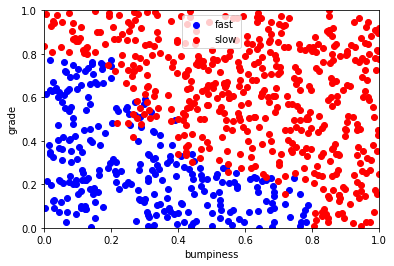

In [8]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

#The adaboost classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from time import time

clf = AdaBoostClassifier(n_estimators=60, learning_rate=1, algorithm="SAMME")

t0 = time()
clf = clf.fit(features_train, labels_train)
t1 = time()
labels_pred = clf.predict(features_test)
t2 = time()

score = accuracy_score(labels_test, labels_pred, normalize=True)

print "training time:", round(t1-t0, 3), "s"
print "testing time:", round(t2-t1, 3), "s"
print "score: {}".format(score)

training time: 0.116 s
testing time: 0.003 s
score: 0.924


# Visualize the classes

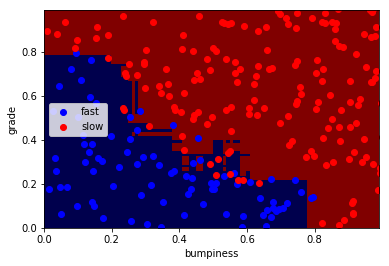

In [37]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass